p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IVF-Zygote vs. IVF-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:1.206e-05 U_stat=1.968e+03
IVF-2C vs. IVF-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:8.536e-04 U_stat=1.231e+04


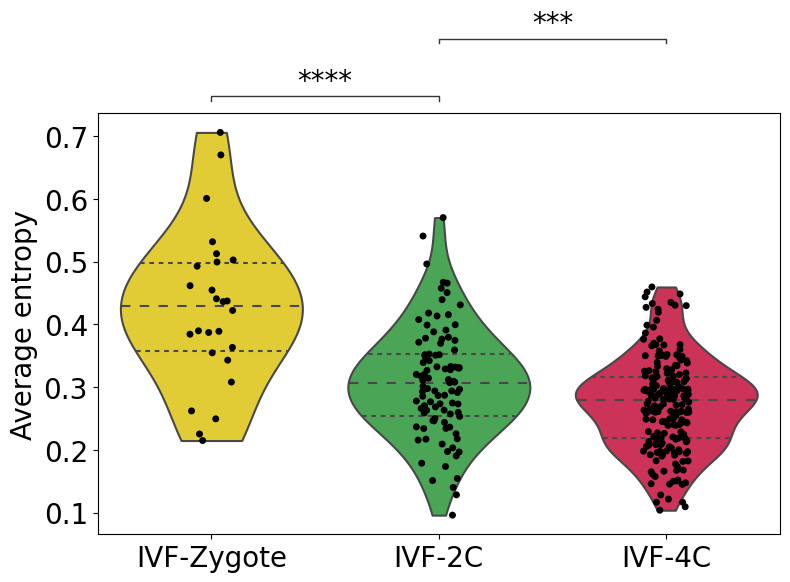

In [1]:
#schic,500k,w10,OneDnSE,target_aver_OneDnSE，IVF
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('532_500k_w10_OneDnSE_CytoTRACE_subTAD.txt', sep='\t')

# 定义配色
color_mapping = {
    "PA-MII": "#ffe119",
    "PA-2C": "#3cb44b",
    "PA-4C": "#e6194b",
    "IVF-Zygote": "#ffe119",
    "IVF-2C": "#3cb44b",
    "IVF-4C": "#e6194b"
}

# 轨迹信息
trajectory_1 = ["PA-MII", "PA-2C", "PA-4C"]
trajectory_2 = ["IVF-Zygote","IVF-2C", "IVF-4C"]
ordered_phenotypes = trajectory_2

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(8, 6))

# 创建小提琴图并应用颜色映射和排序
sns.violinplot(x='Phenotype', y='target_aver_OneDnSE', data=data, 
               palette=color_mapping, order=ordered_phenotypes,
               ax=ax, inner="quart", cut=0, scale="width")
sns.stripplot(x='Phenotype', y='target_aver_OneDnSE', data=data, order=ordered_phenotypes, 
              color='black', size=5, jitter=True)  # 添加jitter

# 配置统计检验
pairs = [("IVF-Zygote", "IVF-2C"),("IVF-2C", "IVF-4C")]
annotator = Annotator(ax, pairs, data=data, x="Phenotype", y="target_aver_OneDnSE", order=ordered_phenotypes)

# 选择统计检验方法
chosen_test = 'Mann-Whitney'  # 你可以动态设置
annotator.configure(test=chosen_test, text_format='star', line_height=0.01, 
                    line_width=1, loc='outside', fontsize=20)
annotator.apply_and_annotate()

# 旋转 x 轴标签
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average entropy', fontsize=20)
plt.xlabel('', fontsize=20)  # 增加x轴标签
plt.tight_layout()

# 保存图片为 PDF
plt.savefig('IVF_entropy.svg', dpi=300, bbox_inches='tight', transparent=True)



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IVF-2C-C1 vs. IVF-2C-C2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.383e-01 U_stat=1.079e+03
IVF-4C-D1 vs. IVF-4C-D2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.977e-01 U_stat=3.689e+03


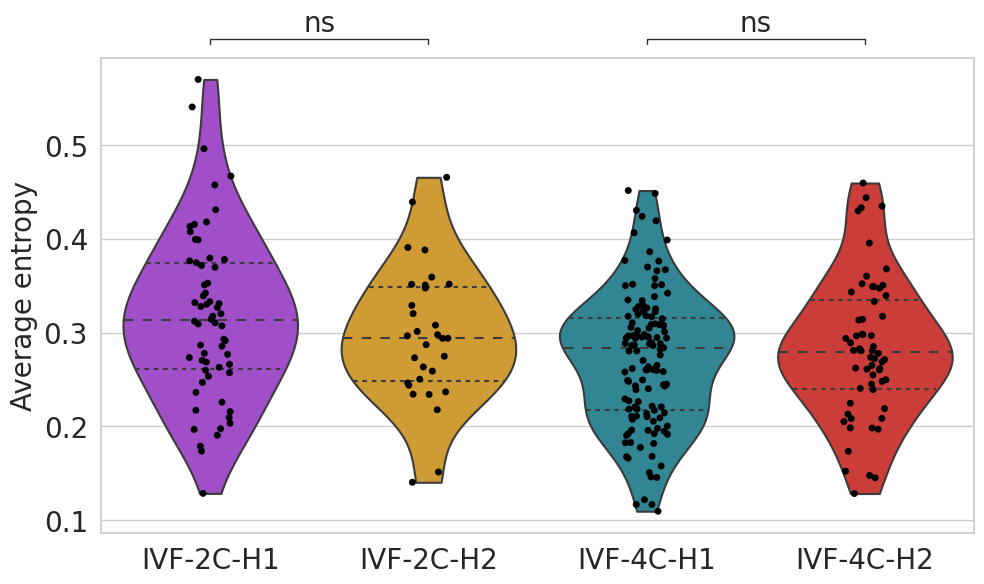

In [6]:
#schic,500k,w10,4个clusters，OneDnSE,target_aver_OneDnSE，tad结构的分类
#IVF
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('532_500k_w10_OneDnSE_CytoTRACE_TAD.txt', sep='\t')

# 设置绘图风格
sns.set(style="whitegrid")

# 定义配色（不改变原始数据标签）
color_mapping = {
    "PA-2C-A1": "#7dace4",
    "PA-2C-A2": "#ff165d",
    "PA-4C-B1": "green",
    "PA-4C-B2": "orange",
    "IVF-2C-C1": "#A73BDD",
    "IVF-2C-C2": "#E7A31B",
    "IVF-4C-D1": "#2292A4",
    "IVF-4C-D2": "#E22720",
}

# 替换横坐标标签的映射
x_label_mapping = {
    "PA-2C-A1": "PA-2C-H1",
    "PA-2C-A2": "PA-2C-H2",
    "PA-4C-B1": "PA-4C-H1",
    "PA-4C-B2": "PA-4C-H2",
    "IVF-2C-C1": "IVF-2C-H1",
    "IVF-2C-C2": "IVF-2C-H2",
    "IVF-4C-D1": "IVF-4C-H1",
    "IVF-4C-D2": "IVF-4C-H2",
}

# 假设有两条发育轨迹的排序信息
trajectory_2 = ["IVF-2C-C1", "IVF-2C-C2", "IVF-4C-D1", "IVF-4C-D2"]

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(10, 6))  # 增加宽度

# 创建小提琴图并应用颜色映射和排序
sns.violinplot(x='Phenotype2', y='target_aver_OneDnSE', data=data, 
               palette=color_mapping, order=trajectory_2,
               ax=ax, inner="quart", cut=0, scale="width")
sns.stripplot(x='Phenotype2', y='target_aver_OneDnSE', data=data, order=trajectory_2, color='black', size=5)

# 对数据进行检验
pairs = [("IVF-2C-C1", "IVF-2C-C2"), ("IVF-4C-D1", "IVF-4C-D2")]
annotator = Annotator(ax, pairs, data=data, x="Phenotype2", y="target_aver_OneDnSE", order=trajectory_2)

annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='outside', fontsize=20)
annotator.apply_and_annotate()

# 替换x轴标签
new_labels = [x_label_mapping[label] for label in trajectory_2]
ax.set_xticklabels(new_labels, fontsize=20)

# 设置坐标轴
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.ylabel('Average entropy', fontsize=20)
plt.xlabel('')
plt.tight_layout()  # 调整布局以避免标签被剪裁

# 保存图片为 PDF
plt.savefig('IVF_entropy_clusters.svg', dpi=300, bbox_inches='tight', transparent=True)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PA-MII vs. PA-2C: Mann-Whitney-Wilcoxon test two-sided, P_val:7.715e-10 U_stat=2.011e+03
PA-2C vs. PA-4C: Mann-Whitney-Wilcoxon test two-sided, P_val:1.888e-03 U_stat=5.024e+03


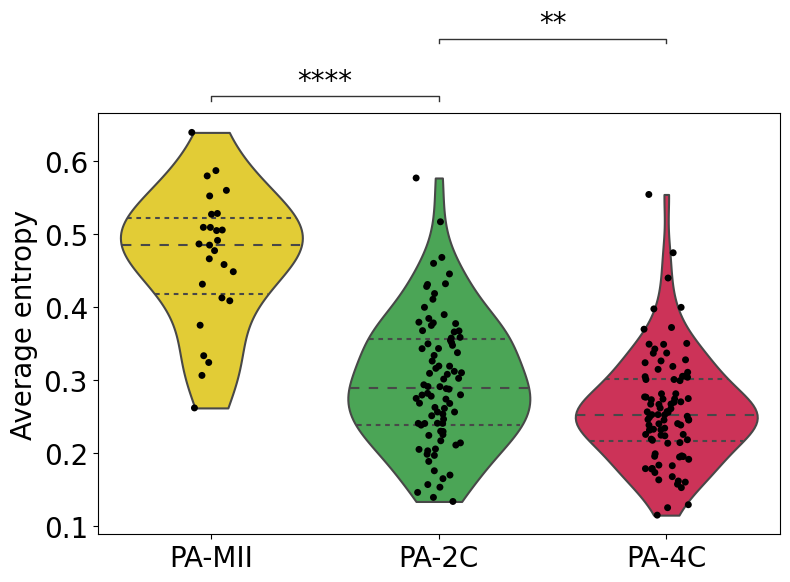

In [2]:
#schic,500k,w10,OneDnSE,target_aver_OneDnSE，PA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats
from IPython.display import SVG, display

# 读取数据
data = pd.read_csv('532_500k_w10_OneDnSE_CytoTRACE_subTAD.txt', sep='\t')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 定义配色
color_mapping = {
    "PA-MII": "#ffe119",
    "PA-2C": "#3cb44b",
    "PA-4C": "#e6194b",
    "IVF-Zygote": "#ffe119",
    "IVF-2C": "#3cb44b",
    "IVF-4C": "#e6194b"
}

# 轨迹信息
trajectory_1 = ["PA-MII", "PA-2C", "PA-4C"]
trajectory_2 = ["IVF-Zygote","IVF-2C", "IVF-4C"]
ordered_phenotypes = trajectory_1 

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(8, 6))

# 创建小提琴图并应用颜色映射和排序
sns.violinplot(x='Phenotype', y='target_aver_OneDnSE', data=data, 
               palette=color_mapping, order=ordered_phenotypes,
               ax=ax, inner="quart", cut=0, scale="width")
sns.stripplot(x='Phenotype', y='target_aver_OneDnSE', data=data, order=ordered_phenotypes, 
              color='black', size=5, jitter=True)  # 添加jitter

# 配置统计检验
pairs = [("PA-MII", "PA-2C"),("PA-2C", "PA-4C")]
annotator = Annotator(ax, pairs, data=data, x="Phenotype", y="target_aver_OneDnSE", order=ordered_phenotypes)

# 选择统计检验方法
chosen_test = 'Mann-Whitney'  # 你可以动态设置
annotator.configure(test=chosen_test, text_format='star', line_height=0.01, 
                    line_width=1, loc='outside', fontsize=20)
annotator.apply_and_annotate()

# 旋转 x 轴标签
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average entropy', fontsize=20)
plt.xlabel('', fontsize=20)  # 增加x轴标签
plt.tight_layout()

# 保存图片为 PDF
plt.savefig('PA_entropy.svg', dpi=300, bbox_inches='tight', transparent=True)


选择了 Mann-Whitney U 检验。
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PA-2C-A1 vs. PA-2C-A2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.680e-01 U_stat=7.440e+02
PA-4C-B1 vs. PA-4C-B2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.663e-01 U_stat=7.800e+02


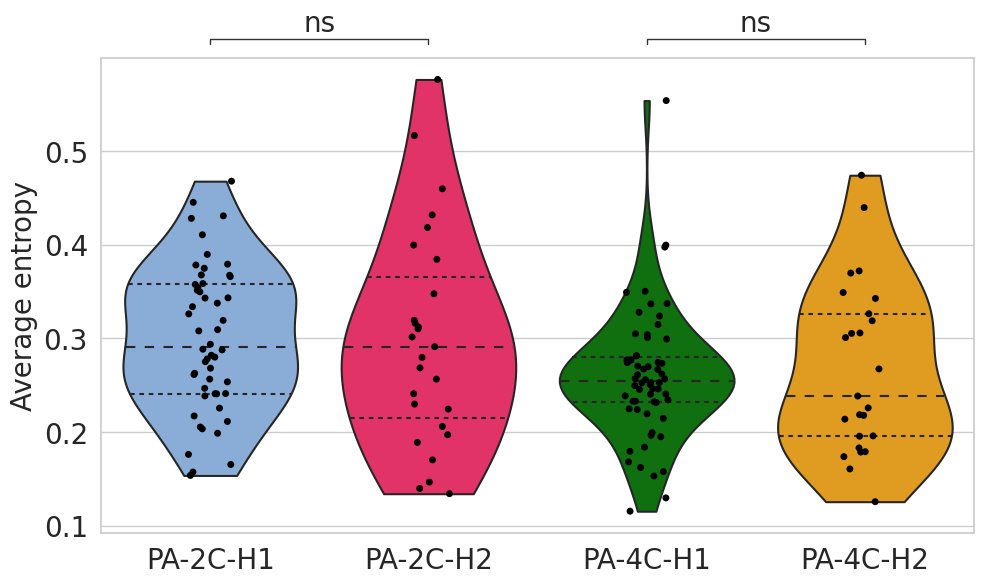

In [7]:
#schic,500k,w10,4个clusters，OneDnSE,target_aver_OneDnSE，tad结构的分类
#PA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('532_500k_w10_OneDnSE_CytoTRACE_TAD.txt', sep='\t')

# 设置绘图风格
sns.set(style="whitegrid")

# 定义配色（不改变原始数据标签）
color_mapping = {
    "PA-2C-A1": "#7dace4",
    "PA-2C-A2": "#ff165d",
    "PA-4C-B1": "green",
    "PA-4C-B2": "orange",
    "IVF-2C-C1": "#A73BDD",
    "IVF-2C-C2": "#E7A31B",
    "IVF-4C-D1": "#2292A4",
    "IVF-4C-D2": "#E22720",
}
# 替换横坐标标签的映射
x_label_mapping = {
    "PA-2C-A1": "PA-2C-H1",
    "PA-2C-A2": "PA-2C-H2",
    "PA-4C-B1": "PA-4C-H1",
    "PA-4C-B2": "PA-4C-H2",
    "IVF-2C-C1": "IVF-2C-H1",
    "IVF-2C-C2": "IVF-2C-H2",
    "IVF-4C-D1": "IVF-4C-H1",
    "IVF-4C-D2": "IVF-4C-H2",
}

# 假设有两条发育轨迹的排序信息
# 轨迹1的细胞类型顺序
trajectory_1 = [
    "PA-2C-A1", "PA-2C-A2", "PA-4C-B1", "PA-4C-B2"
]

# 轨迹2的细胞类型顺序
trajectory_2 = [
    "IVF-2C-C1", "IVF-2C-C2", "IVF-4C-D1", "IVF-4C-D2"
]

# 合并两个轨迹顺序，轨迹1在前，轨迹2在后
ordered_phenotypes = trajectory_1 

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(10, 6))  # 增加宽度

# 创建小提琴图并应用颜色映射和排序
sns.violinplot(x='Phenotype2', y='target_aver_OneDnSE', data=data, 
               palette=color_mapping, order=ordered_phenotypes,
               ax=ax, inner="quart", cut=0, scale="width")
sns.stripplot(x='Phenotype2', y='target_aver_OneDnSE', data=data, order=ordered_phenotypes, color='black', size=5)

# 对数据进行检验
pairs = [("PA-2C-A1", "PA-2C-A2"), ("PA-4C-B1", "PA-4C-B2")]
annotator = Annotator(ax, pairs, data=data, x="Phenotype2", y="target_aver_OneDnSE", order=ordered_phenotypes)

chosen_test='Mann-Whitney'
if chosen_test == 't-test_ind':
    annotator.configure(test='t-test_ind', text_format='star', line_height=0.01, line_width=1, loc='outside', fontsize=20)
    print("选择了 t-检验 (独立样本 t 检验)。")
elif chosen_test == 't-test_welch':
    annotator.configure(test='t-test_welch', text_format='star', line_height=0.01, line_width=1, loc='outside', fontsize=20)
    print("选择了 Welch's t-检验。")
else:
    annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.01, line_width=1, loc='outside', fontsize=20)
    print("选择了 Mann-Whitney U 检验。")

annotator.apply_and_annotate()

# 替换x轴标签
new_labels = [x_label_mapping[label] for label in trajectory_1]
ax.set_xticklabels(new_labels, fontsize=20)

# 旋转 x 轴标签
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average entropy', fontsize=20)
plt.xlabel('')
plt.tight_layout()  # 调整布局以避免标签被剪裁

# 保存图片为 PDF
plt.savefig('PA_entropy_clusters.svg', dpi=300, bbox_inches='tight', transparent=True)
